<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [8]:
# your code goes here
# Load CSV file from URL into a DataFrame
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The qua

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


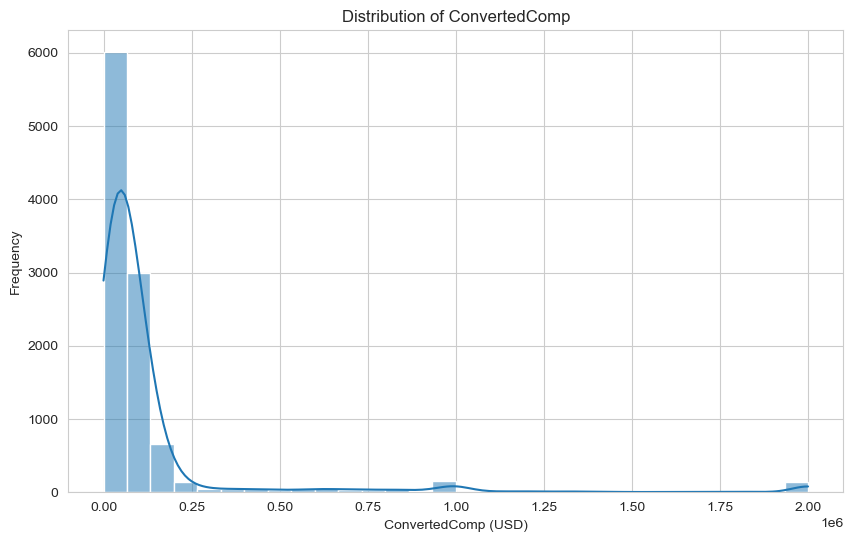

In [13]:
# Set the style of the plot
sns.set_style("whitegrid")

# Plot the distribution curve for ConvertedComp
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df, x='ConvertedComp', kde=True, bins=30)  # Plot the histogram with kernel density estimation
plt.title('Distribution of ConvertedComp')  # Set the plot title
# Set the x-axis label
plt.xlabel('ConvertedComp (USD)')  
# Set the y-axis label
plt.ylabel('Frequency') 
# Show the plot
plt.show()  

Plot the histogram for the column `ConvertedComp`.


In [ ]:
# your code goes here


What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
# Calculate the median age of the respondents
median_age = df['Age'].median()

# Print the median age
print("Median Age of Respondents:", median_age)

Median Age of Respondents: 29.0


How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
# Count the number of responders who identified themselves only as a Man
man_count = df[df['Gender'] == 'Man']['Gender'].count()

# Print the count
print("Number of responders identifying as Man only:", man_count)

Number of responders identifying as Man only: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
# your code goes here
# Filter the DataFrame for respondents who identified as 'Woman'
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for 'Woman' respondents
median_woman_comp = woman_df['ConvertedComp'].median()

# Print the median ConvertedComp
print("Median ConvertedComp of respondents identifying as 'Woman':", median_woman_comp)

Median ConvertedComp of respondents identifying as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
# your code goes here
# Calculate the five-number summary for the 'Age' column
five_num_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

# Print the five-number summary
print("Five-Number Summary for the 'Age' column:")
print(five_num_summary)

Five-Number Summary for the 'Age' column:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


In [18]:
# Calculate the minimum, Q1 (25th percentile), median (Q2, 50th percentile), Q3 (75th percentile), and maximum of the 'Age' column
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Print the five-number summary for the 'Age' column
print("Five-Number Summary for the 'Age' column:")
print("Minimum:", min_age)
print("Q1 (25th percentile):", q1_age)
print("Median (Q2, 50th percentile):", median_age)
print("Q3 (75th percentile):", q3_age)
print("Maximum:", max_age)

Five-Number Summary for the 'Age' column:
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (Q2, 50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


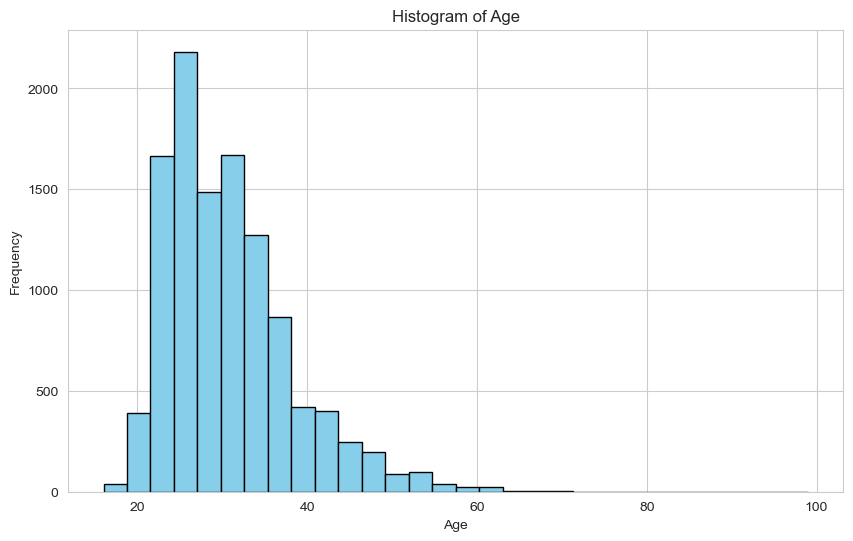

In [19]:
# your code goes here
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram of the 'Age' column
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Display the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


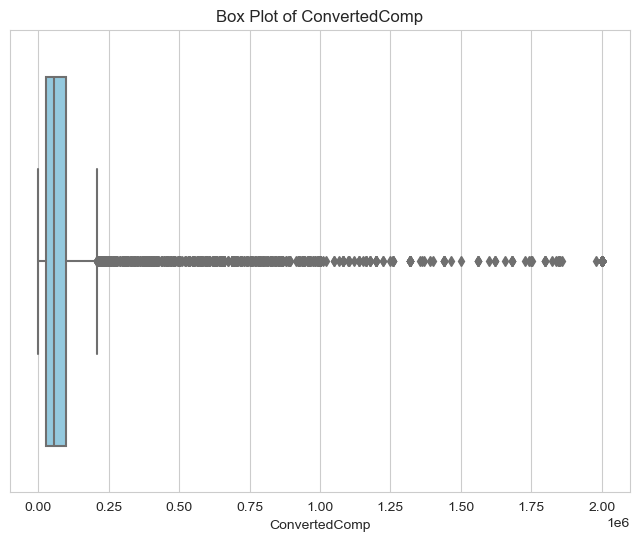

In [20]:
# your code goes here
# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['ConvertedComp'], color='skyblue')  # Plot the box plot
plt.xlabel('ConvertedComp')  # Set the x-axis label
plt.title('Box Plot of ConvertedComp')  # Set the plot title
plt.show()  # Show the plot

In [21]:
# Calculate the median ConvertedComp before removing outliers
median_before_outliers = df['ConvertedComp'].median()

# Print the median ConvertedComp before removing outliers
print("Median ConvertedComp before removing outliers:", median_before_outliers)

Median ConvertedComp before removing outliers: 57745.0


In [23]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median ConvertedComp after removing outliers
median_after_outliers = df_no_outliers['ConvertedComp'].median()

# Print the median ConvertedComp after removing outliers
print("Median ConvertedComp after removing outliers:", median_after_outliers)

Median ConvertedComp after removing outliers: 52704.0


In [24]:

# Calculate the first quartile (Q1) and third quartile (Q3) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean ConvertedComp after removing outliers
mean_after_outliers = df_no_outliers['ConvertedComp'].mean()

# Print the mean ConvertedComp after removing outliers
print("Mean ConvertedComp after removing outliers:", mean_after_outliers)

Mean ConvertedComp after removing outliers: 59883.20838915799


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the Interquartile Range for 'ConvertedComp'
print("Interquartile Range (IQR) for 'ConvertedComp':", IQR)

Interquartile Range (IQR) for 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [26]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the lower and upper bounds
print("Lower Bound for 'ConvertedComp':", lower_bound)
print("Upper Bound for 'ConvertedComp':", upper_bound)

Lower Bound for 'ConvertedComp': -82830.0
Upper Bound for 'ConvertedComp': 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [27]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]['ConvertedComp'].count()

# Print the number of outliers
print("Number of outliers in 'ConvertedComp' column:", outliers_count)

Number of outliers in 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [28]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the first few rows of the new DataFrame
print("First few rows of the new DataFrame without outliers:")
print(df_no_outliers.head())

First few rows of the new DataFrame without outliers:
   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# your code goes here
# Filter out non-numeric columns (e.g., categorical or string columns)
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation between 'Age' and all other numerical columns
age_corr = numeric_columns.corr()['Age']

# Print the correlation values
print("Correlation between Age and all other numerical columns:")
print(age_corr)

Correlation between Age and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
